In [ ]:
import pandas as pd
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ml-latest-small/ratings.csv')
ratings.sample(5)

# 해석
# timestamp는 시청시간x 평점기록시점o
# timestamp는 userId 별로 같은 시간에 몰려있다.

,userId,movieId,rating,timestamp
11363,68,54995,3.5,1283905958
68609,447,349,4.0,836960630
51491,332,3168,3.5,1352672471
8216,57,1242,4.0,965799473
96763,603,2891,4.0,963176689


In [ ]:
ratings.shape

(100836, 4)

In [ ]:
# ratings['movieId']를 unique 하여 movies['movieId']가 생성된것을 유추.
# 총 df.ratings: 100836개 > df.movies: 9742개

print(len(ratings['userId'].unique()))   # 유저 데이터: 610명
print(len(ratings['movieId'].unique()))  # 영화 데이터: 9,724개

610
9724


In [ ]:
ratings['rating'].describe()

# 해석
# 최소값이 0이 아니라 0.5

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [ ]:
# import seaborn as sns
# %는 '매직 명령어'로 그래프를 노트북 셀 안에 인라인으로 표시하도록 하는 명령
%matplotlib inline


<Axes: >

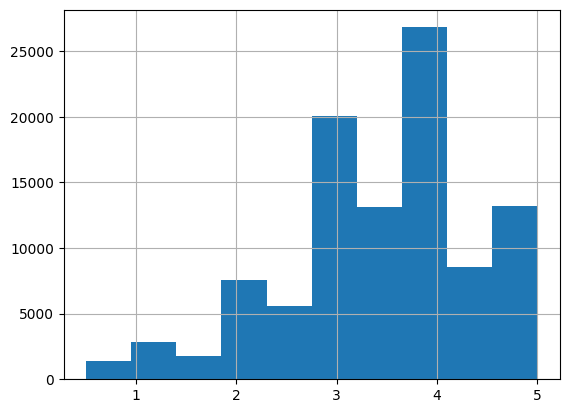

In [ ]:
ratings['rating'].hist()

# 해석
# .5보다는 정수 평점을 많이 준다.

### 사람들은 평균적으로 몇 개의 영화에 대해서 rating을 남겼는가?

In [ ]:
users = ratings.groupby('userId')['movieId'].count()
users[:5]

userId
1    232
2     29
3     39
4    216
5     44
Name: movieId, dtype: int64

In [ ]:
users.describe()

# 해석
# 평균과 중앙값차이가 크다. >> 분포가 평범하지 않을 것이다.

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

In [ ]:
import seaborn as sns

<ipython-input-10-9c0160dc343b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users.values)


<Axes: ylabel='Density'>

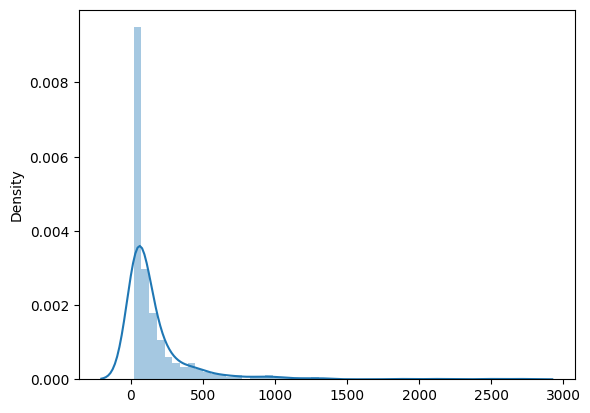

In [ ]:
# sns.distplot: 히스토그램 + 커널 밀도 추정치 = 분포 시각화 함수
# 데이터의 중심 경향과 퍼짐 정도를 시각적으로 파악

sns.distplot(users.values)

# 해석
# power law distribution, 멱함수 분포
# 정규분포를 따르지 않고 소수에 집중
# mean 대신 quantile(25% 50% 75%) 값을 보는것을 권장
# ex. 소득분포

### 사람들이 많이 보는 영화는?

In [ ]:
films = ratings.groupby('movieId')['userId'].count()
films[:5]

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [ ]:
films.describe()

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: userId, dtype: float64

<ipython-input-13-d2313a277511>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(films.values)


<Axes: ylabel='Density'>

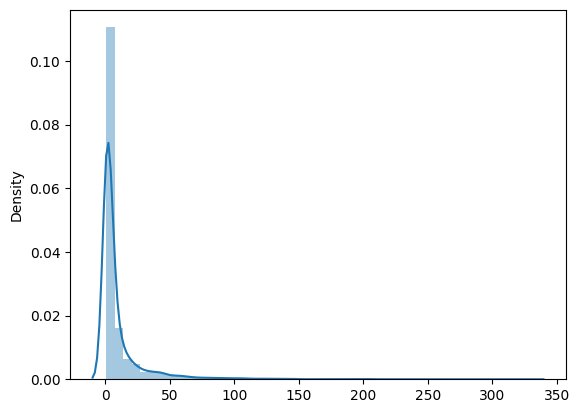

In [ ]:
sns.distplot(films.values)

# 해석
# 소수의 영화만 주로 소비됨
# ex. 컨텐츠 시장

In [ ]:
# 많이 본 영화 순위
films.sort_values(ascending=False)[:5]

movieId
356     329
318     317
296     307
593     279
2571    278
Name: userId, dtype: int64

In [ ]:
# movies.loc[index, column]
# 영화 이름 찾아보기

movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ml-latest-small/movies.csv', index_col='movieId')

# movies.loc[356]
movies.loc[[356, 318, 296, 593, 2571]]

,title,genres
movieId,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War
318,"Shawshank Redemption, The (1994)",Crime|Drama
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


### 겨울왕국 평점보기

In [ ]:
# moviesId = 106696
movies.loc[106696]

title                                         Frozen (2013)
genres    Adventure|Animation|Comedy|Fantasy|Musical|Rom...
Name: 106696, dtype: object

In [ ]:
frozen = ratings[ratings['movieId'] == 106696]
frozen.sample(5)

,userId,movieId,rating,timestamp
37490,252,106696,4.5,1498284778
3572,21,106696,4.0,1403460685
21852,141,106696,3.0,1513129988
9418,63,106696,5.0,1443461176
58821,382,106696,3.5,1515161464


In [ ]:
len(frozen)

29

<Axes: >

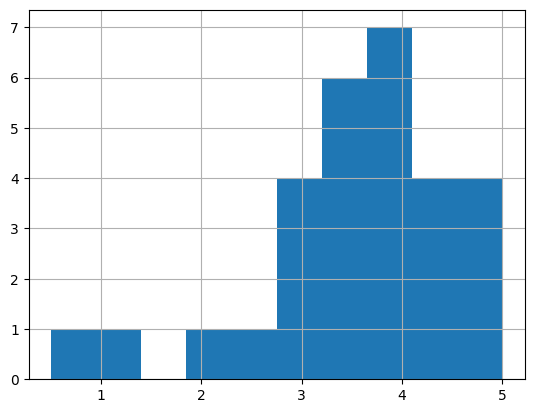

In [ ]:
frozen['rating'].hist()

# 해석
# 평점이 높은 영화이기 때문에 1점을 준 사용자에 대한 추가 분석을 해보기로 함

In [ ]:
frozen.sort_values('rating', ascending=True).head(5)

# 해석
# userId가 '567'이 0.5점을 주었다.

,userId,movieId,rating,timestamp
88023,567,106696,0.5,1525289874
81910,517,106696,1.0,1487955739
53458,352,106696,2.0,1493674468
22567,153,106696,2.5,1525552648
89900,583,106696,3.0,1481474420


<Axes: >

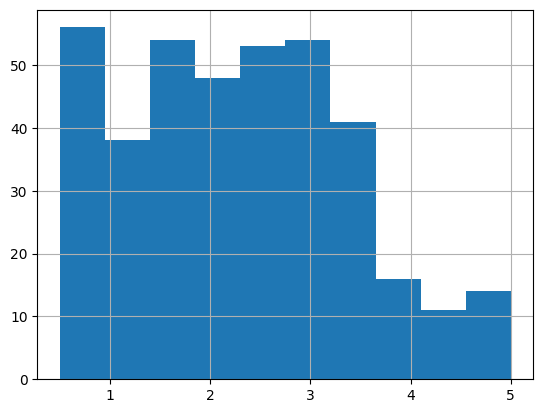

In [ ]:
# 'userId' 567의 평점 분포
ratings.loc[ratings['userId'] == 567, 'rating'].hist()

# 해석
# 전체적으로 점수를 낮게 줌.

<Axes: >

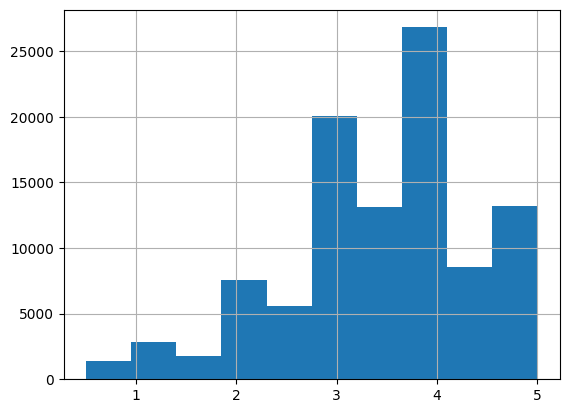

In [ ]:
# 전체 평점 분포
ratings['rating'].hist()